<a href="https://colab.research.google.com/github/simsal0r/bmi_prediction/blob/master/BMI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAM Fitter


In [0]:
#Install necessary libraries
#Set to Python 3!
#Progess bar (tqdm):
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#Menpo
!pip install menpofit
!pip install menpowidgets
!pip install menpodetect
#Usually requires restart of runtime

     / 368kB 1.2MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-so6ebprk/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


     |████████████████████████████████| 184kB 5.8MB/s 
     |████████████████████████████████| 2.4MB 37.4MB/s 
     |████████████████████████████████| 48.2MB 953kB/s 
     |████████████████████████████████| 13.8MB 23.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/3a/c3/d1/38bf5dbd83ab81bd990e69599f8ab0478ce16873c32b1818de
  Stored in directory: /root/.cache/pip/wheels/be/8f/2b/0111df714830b41f6796d3d6685e14a4c648cee5f09ff3c66c
Successfully built menpofit menpo
ERROR: yellowbrick 0.9.1 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
ERROR: scikit-image 0.15.0 has requirement matplotlib!=3.0.0,>=2.0.0, but you'll have matplotlib 1.5.3 which is incompatible.
ERROR: plotnine 0.5.1 has requirement matplotlib>=3.0.0, but you'll have matplotlib 1.5.3 which is incompatible.
ERROR: plotnine 0.5.1 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
ERROR: mir-eval 0.5 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1

     |████████████████████████████████| 153kB 6.6MB/s 
     |████████████████████████████████| 51kB 20.3MB/s 
     |████████████████████████████████| 1.1MB 40.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/51/a9/d5/ec670e5f881ffad7dd6152fc8c76f7f1e5c477a676d6e2b5b9
Successfully built menpowidgets
ERROR: cufflinks 0.14.6 has requirement ipywidgets>=7.0.0, but you'll have ipywidgets 6.0.1 which is incompatible.
  Found existing installation: widgetsnbextension 3.4.2
    Uninstalling widgetsnbextension-3.4.2:
      Successfully uninstalled widgetsnbextension-3.4.2
  Found existing installation: ipywidgets 7.4.2
    Uninstalling ipywidgets-7.4.2:
      Successfully uninstalled ipywidgets-7.4.2


     |████████████████████████████████| 307kB 6.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/fd/80/a8/c933e82edb875d61938c6264802fc4e26b062fc648247a6843
Successfully built menpodetect


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Method to load images

%matplotlib inline
from pathlib import Path
import menpo.io as mio

def load_database(path_to_images, crop_percentage, max_images=None):
    images = []
    # load landmarked images
    for i in mio.import_images(path_to_images, max_images=max_images, verbose=True):
        # crop image
        i = i.crop_to_landmarks_proportion(crop_percentage)
        
        # convert it to grayscale if needed
        if i.n_channels == 3:
            i = i.as_greyscale(mode='luminosity')
            
        # append it to the list
        images.append(i)
    return images

In [0]:
path_to_lfpw = Path('gdrive/My Drive/Advanced_Computer_Vision/Datasets/Appearance_Model/lfpw')

In [0]:
training_images = load_database(path_to_lfpw / 'lfpw_train', 0.5, 700)

Found 687 assets, index the returned LazyList to import.


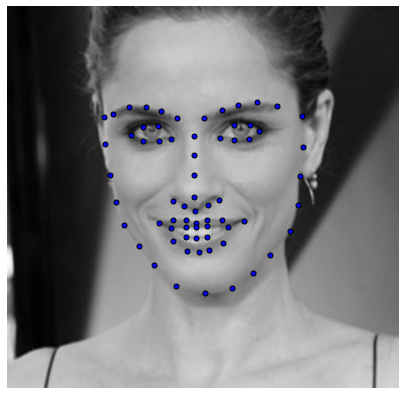

In [0]:
#Show an image
training_images[3].view_landmarks()

In [0]:
#Patch based AAM
from menpofit.aam import PatchAAM
from menpo.feature import double_igo

patch_based_aam = PatchAAM(
    training_images,
    group='PTS',
    verbose=True,
    holistic_features=double_igo, 
    diagonal=120, 
    scales=(0.5, 1.0)
)
#print(patch_based_aam)

- Computing reference shape                                                     Computing batch 0
- Building models
  - Scale 0: Done
  - Scale 1: Done
                                                              

In [0]:
#Train a fitting model
from menpofit.aam import LucasKanadeAAMFitter
# fitter = LucasKanadeAAMFitter(patch_based_aam, 
#                               n_shape=None, 
#                               n_appearance=None)

fitter = LucasKanadeAAMFitter(patch_based_aam, 
                             n_shape=[3, 12], 
                             n_appearance=50)

In [0]:
#Load test images
# test_images = load_database(path_to_lfpw / 'test', 0.5, max_images= 100)

In [0]:
#Test the fitter with the test dataset
# from menpofit.fitter import noisy_shape_from_bounding_box


# fitting_results = []

# for i in test_images:
#     # obtain original landmarks
#     gt_s = i.landmarks['PTS'].lms
    
#     # generate perturbed landmarks
#     s = noisy_shape_from_bounding_box(gt_s, gt_s.bounding_box())
    
#     # fit image
#     fr = fitter.fit_from_shape(i, s, gt_shape=gt_s) 
#     fitting_results.append(fr)
    
#     print(fr)

# Face Detection

In [0]:
from pathlib import Path
import menpo.io as mio
# method to load a database w/o cropping
def load_database_no_crop(path_to_images, max_images=None):
    images = []
    # load landmarked images
    for i in mio.import_images(path_to_images, max_images=max_images, verbose=True):
        # convert it to grayscale if needed
        if i.n_channels == 3:
            i = i.as_greyscale(mode='luminosity')
            
        # append it to the list
        images.append(i)
    return images

In [0]:
n_images = 20

In [0]:
path_to_bmi = Path('gdrive/My Drive/Advanced_Computer_Vision/Datasets/BMIData/Data/Images_Reupload')
#Test
BMI_images = load_database_no_crop(path_to_bmi, 3)

Found 3 assets, index the returned LazyList to import.


In [0]:
BMI_images = load_database_no_crop(path_to_bmi, n_images)

Found 20 assets, index the returned LazyList to import.


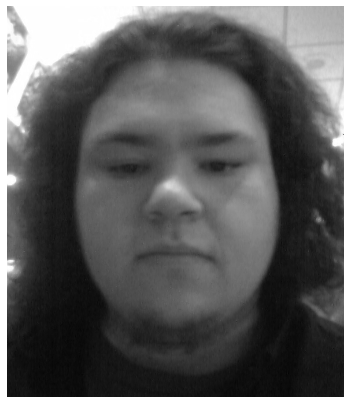

In [0]:
BMI_images[15].view()

In [0]:
from menpodetect import load_dlib_frontal_face_detector
from tqdm import tqdm_notebook as tqdm
import numpy as np

# Load detector
detect = load_dlib_frontal_face_detector()

identified_faces = list()
identified_faces2 = list()#we only need images where we actually detect faces
counter = 0
shapes_landmarks = list()
detected_results = list()
all_sl = list()
all_dr = list()

for y in tqdm(range(0,n_images)):
  image = BMI_images[y]
  bboxes = detect(image)
  print("{} detected faces.".format(len(bboxes)) + " File: " + str(counter))
  # fitting
  if len(bboxes) == 1: #we only need images where we actually detect faces      
      # initial bbox
        initial_bbox = bboxes[0]

      # fit image
        result = fitter.fit_from_bb(image, initial_bbox, max_iters=50)
      #if np.mean(result.displacements_stats("median")) <= 0.63:
        detected_results.append(result) # uncomment to save Ram
        shapes_landmarks.append(result.final_shape)
        identified_faces.append(counter)
        all_sl.append(result.final_shape)
        all_dr.append(counter)
      #else:
       # print("Face skipped because of high displacement.")
        #identified_faces2.append(counter)
        #all_sl.append(result.final_shape)
       # all_dr.append(counter)
  else:
      print("No face identifid")
  counter = counter + 1

1 detected faces. File: 0
1 detected faces. File: 1
1 detected faces. File: 2
1 detected faces. File: 3
1 detected faces. File: 4
1 detected faces. File: 5
1 detected faces. File: 6
1 detected faces. File: 7
1 detected faces. File: 8
1 detected faces. File: 9
1 detected faces. File: 10
1 detected faces. File: 11
1 detected faces. File: 12
1 detected faces. File: 13
1 detected faces. File: 14
1 detected faces. File: 15
1 detected faces. File: 16
1 detected faces. File: 17
1 detected faces. File: 18
1 detected faces. File: 19



In [0]:
#Save to file
import pickle

#df_loaded = pd.DataFrame()

# with open('gdrive/My Drive/Advanced_Computer_Vision/Colab_Data/0-shapes_landmarks.pkl', 'wb') as output:

#     pickle.dump(shapes_landmarks, output, pickle.HIGHEST_PROTOCOL)
    
# with open('gdrive/My Drive/Advanced_Computer_Vision/Colab_Data/0-detected_results.pkl', 'wb') as output:

#     pickle.dump(detected_results, output, pickle.HIGHEST_PROTOCOL)
    
# with open('gdrive/My Drive/Advanced_Computer_Vision/Colab_Data/0-identified_faces.pkl', 'wb') as output:

#     pickle.dump(all_sl, output, pickle.HIGHEST_PROTOCOL)

with open('gdrive/My Drive/Advanced_Computer_Vision/Colab_Data/0-shapes_landmarks.pkl', 'rb') as input:
    shapes_landmarks = pickle.load(input)
with open('gdrive/My Drive/Advanced_Computer_Vision/Colab_Data/0-detected_results', 'rb') as input:
    detected_results = pickle.load(input)
with open('gdrive/My Drive/Advanced_Computer_Vision/Colab_Data/0-shapes_landmarks.pkl', 'rb') as input:
    shapes_landmarks = pickle.load(input)

In [0]:
# detected_results[0].n_iters

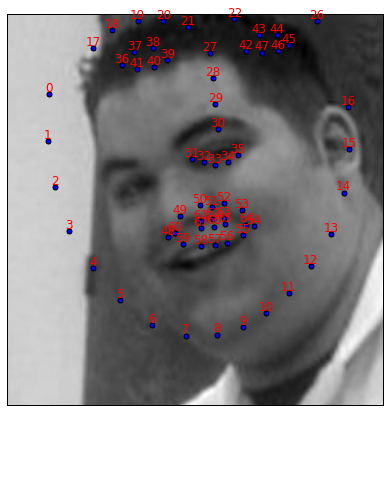

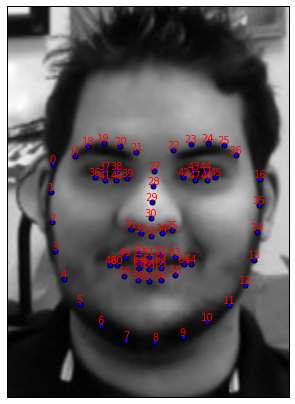

In [0]:
detected_results[4].view(new_figure=True)
detected_results[4].final_shape.view(marker_face_colour='b', render_numbering=True, numbers_font_colour="red", numbers_font_size=12)


detected_results[5].view(new_figure=True)
detected_results[5].final_shape.view(marker_face_colour='b', render_numbering=True, numbers_font_colour="red")

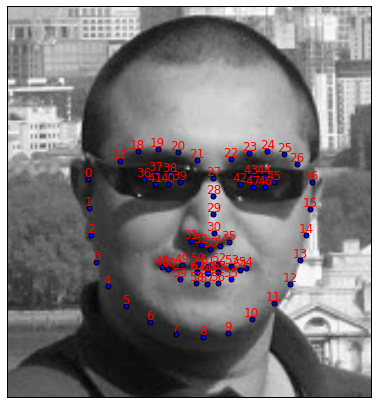

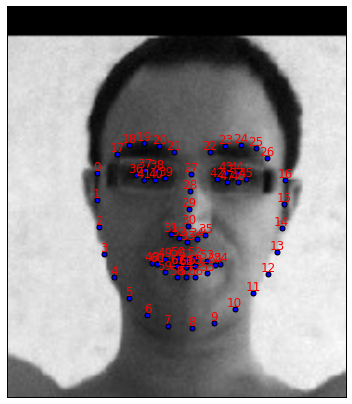

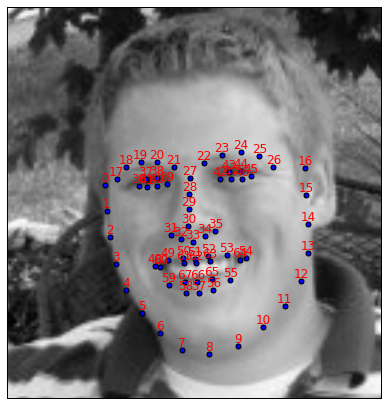

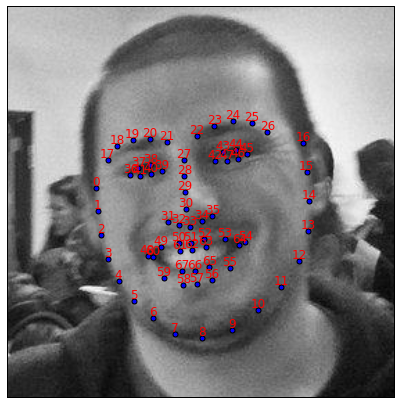

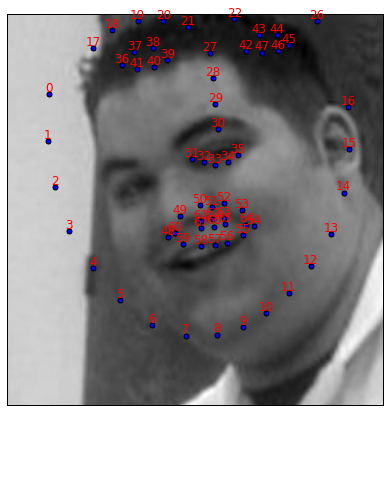

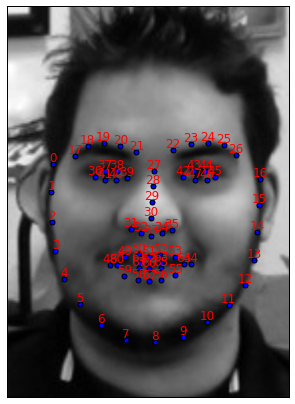

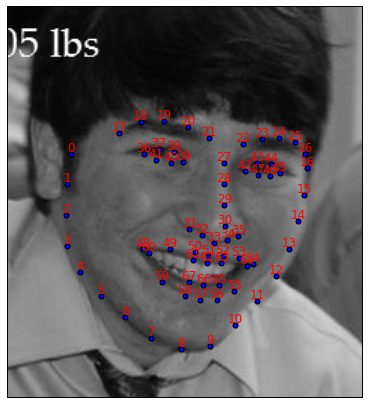

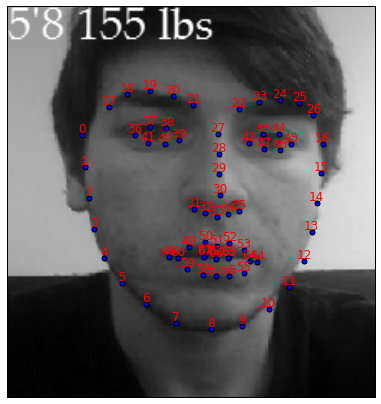

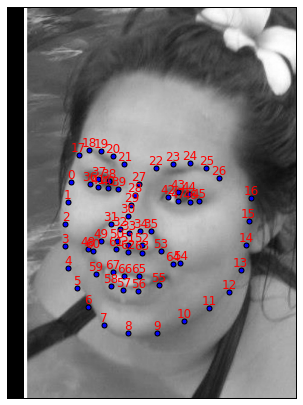

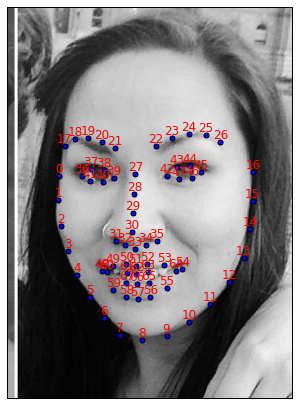

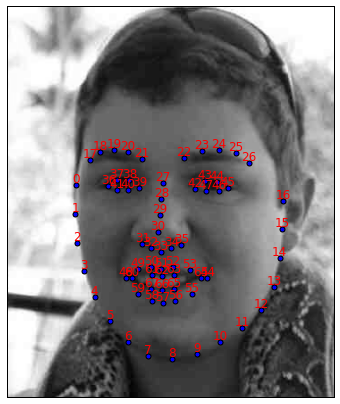

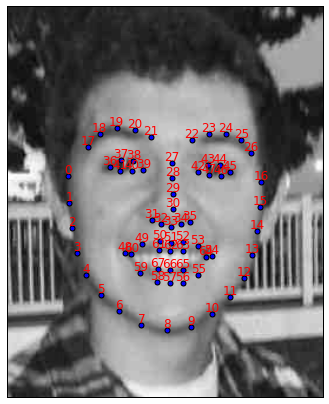

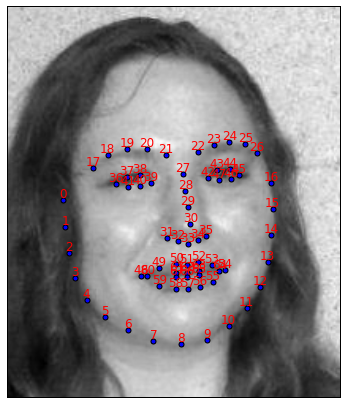

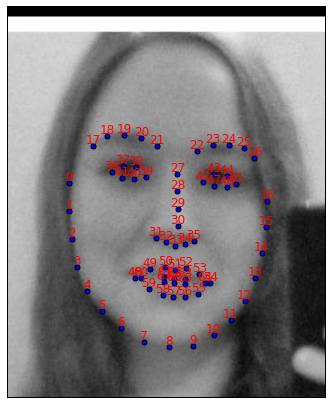

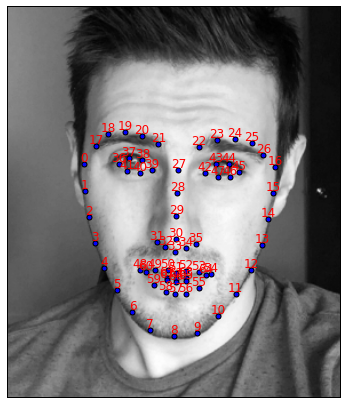

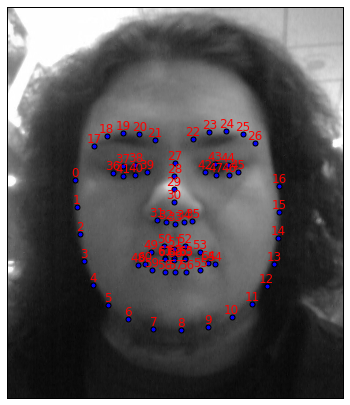

In [0]:
import numpy as np
import matplotlib.pyplot as plt
listcounter = 0
for y in identified_faces:

  detected_results[listcounter].view(new_figure=True)
  detected_results[listcounter].final_shape.view(marker_face_colour='b', render_numbering=True, numbers_font_colour="red", numbers_font_size=12)
  #plt.title("Image " + str(y) + " Iterations: "  + str(detected_results[y].n_iters()))
  #plt.title("Image " + str(y) + " Iterations: "  + str(detected_results[listcounter].n_iters) + " Dis Mean " + str(np.mean(detected_results[listcounter].displacements_stats()))+ " Dis Med " + str(np.mean(detected_results[listcounter].displacements_stats("median"))))
  listcounter += 1
  if listcounter > 15:
    break
  

# Face Alignment

In [0]:
#backup_shapes_landmarks = shapes_landmarks
#backup_detected_results = detected_results

#Uncomment if you want to use all
#shapes_landmarks = all_sl.copy()
#detected_results = all_dr.copy()

In [0]:
len(shapes_landmarks)

20

In [0]:
import menpofit
shapes_aligned = menpofit.builder.align_shapes(shapes_landmarks)

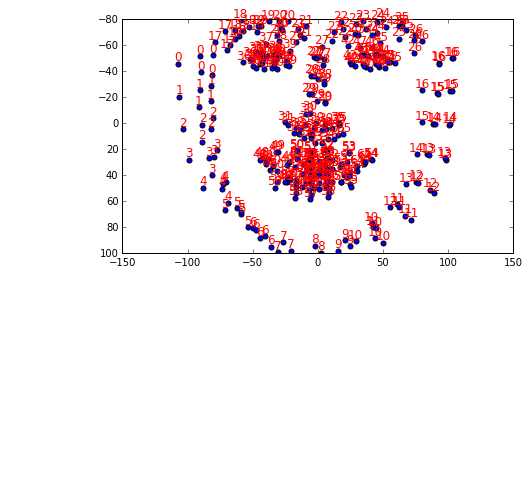

In [0]:
for y in range(0,5):
  shapes_aligned[y].view(marker_face_colour='b', render_numbering=True, numbers_font_colour="red", numbers_font_size=12)


# Face Features Extraction

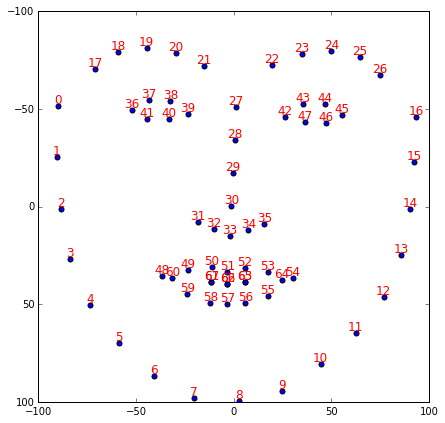

In [0]:
shapes_aligned[1].view(marker_face_colour='b', render_numbering=True, numbers_font_colour="red", numbers_font_size=12)

In [0]:
from shapely.geometry import Polygon
from math import sqrt

def distBetweenPoints(p1, p2):
  return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


def getThirdPoint(p1, p2):
  dBetweenPoints = distBetweenPoints(p1, p2)
  x = p1[1] + (dBetweenPoints / 2)
  y = p1[0] + dBetweenPoints
  return [y, x]


def get_features(points ,max_images=None):
      
  if len(points) == 68:
    features = []

  ### Cheekbone width to jaw width
  CJWR = distBetweenPoints(points[0], points[16]) / distBetweenPoints(points[4], points[12])
  features.append(CJWR)

  ### Cheekbone width to upper facial height: |P5,P13|/|P67,P28| 
  WHR = distBetweenPoints(points[4], points[12]) / distBetweenPoints(points[66], points[27])
  features.append(WHR)

  ### Ratio of perimeter to area of polygon running through P1 P5 P9 P13 P17 P1
  polygon = Polygon([(points[0][1], points[0][0]), (points[4][1], points[4][0]),  (points[8][1], points[8][0]),
                    (points[12][1], points[12][0]), (points[16][1], points[16][0]), (points[0][1], points[0][0])])
  PAR = polygon.length / polygon.area
  features.append(PAR)

  ### ES average size of eyes: average distance between #different from paper
  ES = 0.5 * (distBetweenPoints(points[36], points[39]) + distBetweenPoints(points[42], points[45]))
  features.append(ES)
  
  #Unchanged

  ### LFFH is lower face to face height ratio |P28, P9|/|N, P9| where N = 20 and 25 are the bases of the equilateral triangle
  #N = getThirdPoint(points[19], points[24])
  #LFFH = distBetweenPoints(points[27], points[8]) / distBetweenPoints(N, points[8])
  #       print('LFFH: ', LFFH)
  # features.append(LFFH)

  ### FWLFH: |P1, P17|/LFH
  FWLFH = distBetweenPoints(points[0], points[16]) / distBetweenPoints(points[27], points[8])
  features.append(FWLFH)

  ### MEH distance between eyebrows and upper edge of eyes: 
  MEH = (1/6) * (distBetweenPoints(points[17], points[36]) + distBetweenPoints(points[19], points[37]) + distBetweenPoints(points[21], points[39]) + 
                 distBetweenPoints(points[22], points[42]) + distBetweenPoints(points[24], points[44]) + distBetweenPoints(points[26], points[45]))
  features.append(MEH)
                  
  ##Mouth chin ratio
                  
  MCR = (1/5) * (distBetweenPoints(points[48], points[5]) + distBetweenPoints(points[59], points[6]) + distBetweenPoints(points[57], points[8]) + 
                 distBetweenPoints(points[55], points[10]) + distBetweenPoints(points[54], points[11]))
  features.append(MCR)                
                 
  return features

In [0]:
import pandas as pd

features = list()
listcounter = 0
for x in identified_faces:
  features.append(get_features(shapes_aligned[listcounter].points))
  listcounter += 1
  
df = pd.DataFrame(features)

df.head(5)

,0,1,2,3,4,5,6
0,1.226092,1.916273,0.022706,38.918202,1.398756,29.719748,54.708307
1,1.220161,1.662789,0.022911,35.409842,1.221048,33.552129,54.545853
2,1.147054,1.668903,0.021621,33.529154,1.132252,23.342424,62.184255
3,1.165454,1.638881,0.022763,34.588316,1.189060,31.227675,53.319855
4,1.372494,1.256622,0.025512,31.271907,1.063298,23.650710,57.575639


In [0]:
len(df)

3865

In [0]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
  
def standardize(df):
    result = df.copy()
    for feature_name in df.columns:
        std = np.std(df[feature_name])
        mean = np.mean(df[feature_name])
        result[feature_name] = (df[feature_name] - mean) / std
    return result

In [0]:
df_std = standardize(df)
df_std["Image_ID"] = identified_faces
df_std.head(3)

,0,1,2,3,4,5,6,Image_ID
0,0.273832,1.607574,-0.843150,1.003425,1.981797,-0.639831,0.247063,0
1,0.159816,0.147532,-0.585927,-0.201645,0.059537,0.170320,0.225296,1
2,-1.245421,0.182752,-2.208138,-0.847634,-0.900961,-1.987973,1.248754,2


# BMI 

In [0]:
#Read BMI data
import pandas as pd
df_data = pd.read_csv('gdrive/My Drive/Advanced_Computer_Vision/Datasets/BMIData/Data/data_beta.csv',sep=',')

In [0]:
df_data.head(5)

,id,bmi,gender,is_training,name,custom_id
0,0,34.207396,Male,1,img_0.bmp,0
1,1,26.453720,Male,1,img_1.bmp,1
2,10,38.732782,Male,1,img_10.bmp,2
3,100,29.834105,Male,1,img_100.bmp,3
4,1000,42.240827,Male,1,img_1000.bmp,4


In [0]:
#Get associated BMI by filename
def get_bmi(custom_id):
  try:
    return(df_data.loc[df_data['custom_id'] == custom_id]["bmi"].values[0])
  except:
    print("Value: " + filename + " not found") 

In [0]:
bmis = list()
for x in identified_faces:
  try:
    bmis.append(get_bmi(x))
  except:
    print(x)

In [0]:
df_std["Response"] = bmis

In [0]:
df_std.head(20)

,0,1,2,3,4,5,6,Image_ID,Response
0,0.273832,1.607574,-0.843150,1.003425,1.981797,-0.639831,0.247063,0,34.207396
1,0.159816,0.147532,-0.585927,-0.201645,0.059537,0.170320,0.225296,1,26.453720
2,-1.245421,0.182752,-2.208138,-0.847634,-0.900961,-1.987973,1.248754,2,38.732782
3,-0.891746,0.009825,-0.771947,-0.483827,-0.286469,-0.321061,0.061026,3,29.834105
4,3.087918,-2.191948,2.686485,-1.622965,-1.646827,-1.922803,0.631252,4,42.240827
5,-1.180752,1.220071,-1.975507,-0.223358,0.058568,-0.249863,1.154722,5,36.045506
6,-0.066904,-0.315944,-0.248812,0.080107,0.323898,-0.686602,-0.942858,6,31.166739
7,-0.179909,-0.222751,0.459773,1.176912,0.167944,0.092772,-1.046510,7,23.565095
8,-1.831456,0.721045,-1.021982,0.491905,0.019762,0.799064,0.035034,8,43.222990
9,1.148194,-1.414131,0.933318,0.107309,-0.502733,0.572450,-1.631665,9,29.128536


In [0]:
df_std = df_std[(df_std["Response"] <= 30) & (df_std["Response"] >= 22)]

In [0]:
len(df_std)

537

In [0]:
#Save to file
import pickle
import pandas as pd

df_std = pd.DataFrame()

# with open('gdrive/My Drive/Advanced_Computer_Vision/Colab_Data/df_std-July10-All.pkl', 'wb') as output:

#     pickle.dump(df_std, output, pickle.HIGHEST_PROTOCOL)

with open('gdrive/My Drive/Advanced_Computer_Vision/Colab_Data/df_std-July10-All.pkl', 'rb') as input:
    df_std = pickle.load(input)

FileNotFoundError: ignored

# Prediction

In [0]:
from sklearn.svm import SVR
import numpy as np
test_size = 200
training_set =  len(df_std) - test_size

y = df_std.iloc[0:training_set]["Response"]
X = df_std.iloc[0:training_set,0:6]
clf = SVR(gamma='scale', C=1, epsilon=0.1) #C: penalty, default:1
clf.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prd = clf.predict(df_std.iloc[training_set:(len(df_std)-1),0:6])
#prd

In [0]:
clf.score(df_std.iloc[training_set:(len(df_std)),0:6],df_std.iloc[training_set:(len(df_std))]["Response"])

-0.4580642132920498

In [0]:
a = clf.predict(df_std.iloc[training_set:(len(df_std)),0:6])
b = df_std.iloc[training_set:(len(df_std))]["Response"]
print("Prediction")
print(list(a))
print("Real value")
print(list(b))
print("Difference")
print(list(a-b))
print("Avg Difference")
print(np.mean(np.absolute(a-b)))

Prediction
[27.39868877993657, 23.93716788998146, 28.324971076385996, 24.710122054639523, 23.611782502931725, 28.018940051658614, 27.149551096850033, 28.100088361457093, 24.519519454072267, 27.43224350915343, 27.805953798061655, 27.64057947172861, 23.399184832565822, 26.880704801073865, 26.044957185982433, 26.078658030578975, 27.799866235871985, 26.068045963384815, 27.08960155372861, 26.65159218751218, 27.693980185307506, 29.353157148080225, 26.22892556329819, 27.22469193942626, 27.139669597051476, 25.40252340919988, 26.472560485483275, 25.985534553848176, 27.063940668726264, 25.982416642691717, 25.369700242097537, 26.185602022653544, 28.456769521200712, 27.37477596163144, 27.331673600125136, 26.610310036307634, 28.08288662032228, 31.595090310254243, 25.263295676103468, 24.92467745715578, 25.814256072576917, 25.960737471140437, 22.841586766579148, 27.100230751023705, 31.39326670126155, 26.434678124389766, 26.625882412538402, 29.428304991829435, 26.508129620336202, 25.3054098016612, 27.

In [0]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
openjdk version "11.0.3" 2019-04-16
OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1)
OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)


In [0]:
! pip install h2o

In [0]:
import h2o
import pandas as pd
import numpy as np

In [0]:
df_std = df_std.drop('Image_ID', 1)

In [0]:
df_std.columns = df_std.columns.astype(str)

In [0]:

test_size = 350
training_set =  len(df_std) - test_size
train1 = df_std.iloc[0:training_set,]
test1 = df_std.iloc[training_set:len(df_std),]
train1.head(2)

,0,1,2,3,4,5,6,Response
1,0.159816,0.147532,-0.585927,-0.201645,0.059537,0.170320,0.225296,26.453720
3,-0.891746,0.009825,-0.771947,-0.483827,-0.286469,-0.321061,0.061026,29.834105


In [0]:
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.H2OFrame(train1)
test = h2o.H2OFrame(test1)

# Identify predictors and response
x = train.columns
y = "Response"
x.remove(y)

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,3 hours 10 mins
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,"21 days, 22 hours and 29 minutes"
H2O cluster name:,H2O_from_python_unknownUser_yibez5
H2O cluster total nodes:,1
H2O cluster free memory:,2.919 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20190710_222211_model_1,4.70305,2.16865,4.70305,1.84961,0.0800245
StackedEnsemble_AllModels_AutoML_20190710_222211,4.71445,2.17128,4.71445,1.84344,0.0800718
StackedEnsemble_BestOfFamily_AutoML_20190710_222211,4.72236,2.1731,4.72236,1.84676,0.0801693
DeepLearning_1_AutoML_20190710_222211,4.74683,2.17872,4.74683,1.83971,0.0804037
GBM_5_AutoML_20190710_222211,4.7492,2.17927,4.7492,1.84557,0.080366
DeepLearning_grid_1_AutoML_20190710_222211_model_2,4.80694,2.19247,4.80694,1.85268,0.0808192
XGBoost_grid_1_AutoML_20190710_222211_model_3,4.80805,2.19273,4.80805,1.85413,0.0807231
XGBoost_3_AutoML_20190710_222211,4.81749,2.19488,4.81749,1.85125,0.0806618
DeepLearning_grid_1_AutoML_20190710_222211_model_1,4.87207,2.20728,4.87207,1.85179,0.0813795
GBM_grid_1_AutoML_20190710_222211_model_1,4.91234,2.21638,4.91234,1.87027,0.0816771


In [0]:
# def shape_to_cord(final_shape_as_vector):
#   b = final_shape_as_vector[::2]  # Start at first element, then every other.
#   c = final_shape_as_vector[1::2]  # Start at second element, then every other.
#   # initialize the list of (x, y)-coordinates
#   length1 = int((len(final_shape_as_vector)/2))
#   print(length1)
#   coords = np.zeros((length1, 2))
#   # loop over all facial landmarks and convert them
#   # to a 2-tuple of (x, y)-coordinates
#   for i in range(0, length1):
#     coords[i] = (c[i], b[i])
#   # return the list of (x, y)-coordinates
#   return(coords)

In [0]:
# detected_results[0].final_shape.view(marker_face_colour='b', render_numbering=True, numbers_font_colour="red", numbers_font_size=12)

In [0]:
# detected_results[0].final_shape.as_vector()

In [0]:
# detected_results[0].final_shape

In [0]:
# !pip install --upgrade imutils

In [0]:
# # import the necessary packages
# from collections import OrderedDict
# import numpy as np
# import cv2

# # define a dictionary that maps the indexes of the facial
# # landmarks to specific face regions

# #For dlib’s 68-point facial landmark detector:
# FACIAL_LANDMARKS_68_IDXS = OrderedDict([
# 	("mouth", (48, 68)),
# 	("inner_mouth", (60, 68)),
# 	("right_eyebrow", (17, 22)),
# 	("left_eyebrow", (22, 27)),
# 	("right_eye", (36, 42)),
# 	("left_eye", (42, 48)),
# 	("nose", (27, 36)),
# 	("jaw", (0, 17))
# ])

# #For dlib’s 5-point facial landmark detector:
# FACIAL_LANDMARKS_5_IDXS = OrderedDict([
# 	("right_eye", (2, 3)),
# 	("left_eye", (0, 1)),
# 	("nose", (4))
# ])

# # in order to support legacy code, we'll default the indexes to the
# # 68-point model
# FACIAL_LANDMARKS_IDXS = FACIAL_LANDMARKS_68_IDXS

# def rect_to_bb(rect):
# 	# take a bounding predicted by dlib and convert it
# 	# to the format (x, y, w, h) as we would normally do
# 	# with OpenCV
# 	x = rect.left()
# 	y = rect.top()
# 	w = rect.right() - x
# 	h = rect.bottom() - y

# 	# return a tuple of (x, y, w, h)
# 	return (x, y, w, h)

# def shape_to_np(shape, dtype="int"):
# 	# initialize the list of (x, y)-coordinates
# 	coords = np.zeros((shape.num_parts, 2), dtype=dtype)

# 	# loop over all facial landmarks and convert them
# 	# to a 2-tuple of (x, y)-coordinates
# 	for i in range(0, shape.num_parts):
# 		coords[i] = (shape.part(i).x, shape.part(i).y)

# 	# return the list of (x, y)-coordinates
# 	return coords

In [0]:
# #Rewrite
     
# desiredLeftEye=(0.35, 0.35)
# desiredFaceWidth=256
# desiredFaceHeight=256

# shape = shape_to_cord(detected_results[0].final_shape.as_vector())


# # extract the left and right eye (x, y)-coordinates
# (lStart, lEnd) = FACIAL_LANDMARKS_IDXS["left_eye"]
# (rStart, rEnd) = FACIAL_LANDMARKS_IDXS["right_eye"]
# leftEyePts = shape[lStart:lEnd]
# rightEyePts = shape[rStart:rEnd]
# # compute the center of mass for each eye
# leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
# rightEyeCenter = rightEyePts.mean(axis=0).astype("int")
# # compute the angle between the eye centroids
# dY = rightEyeCenter[1] - leftEyeCenter[1]
# dX = rightEyeCenter[0] - leftEyeCenter[0]
# angle = np.degrees(np.arctan2(dY, dX)) - 180
# # compute the desired right eye x-coordinate based on the
# # desired x-coordinate of the left eye
# desiredRightEyeX = 1.0 - desiredLeftEye[0]
# # determine the scale of the new resulting image by taking
# # the ratio of the distance between eyes in the *current*
# # image to the ratio of distance between eyes in the
# # *desired* image
# dist = np.sqrt((dX ** 2) + (dY ** 2))
# desiredDist = (desiredRightEyeX - desiredLeftEye[0])
# desiredDist *= desiredFaceWidth
# scale = desiredDist / dist
# # compute center (x, y)-coordinates (i.e., the median point)
# # between the two eyes in the input image
# eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) // 2,
#     (leftEyeCenter[1] + rightEyeCenter[1]) // 2)
# # grab the rotation matrix for rotating and scaling the face
# M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)
# # update the translation component of the matrix
# tX = desiredFaceWidth * 0.5
# tY = desiredFaceHeight * desiredLeftEye[1]
# M[0, 2] += (tX - eyesCenter[0])
# print((tX - eyesCenter[0]))
# M[1, 2] += (tY - eyesCenter[1])
# print(tY - eyesCenter[1])

# ###################

# image = BMI_images[0]

# # apply the affine transformation
# (w, h) = (desiredFaceWidth, desiredFaceHeight)
# #output = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC)


In [0]:
# M

In [0]:
# # import the necessary packages
# import numpy as np
# import cv2

# class FaceAligner:
#     def __init__(self, predictor, desiredLeftEye=(0.35, 0.35),
#         desiredFaceWidth=256, desiredFaceHeight=None):
#         # store the facial landmark predictor, desired output left
#         # eye position, and desired output face width + height
#         self.predictor = predictor
#         self.desiredLeftEye = desiredLeftEye
#         self.desiredFaceWidth = desiredFaceWidth
#         self.desiredFaceHeight = desiredFaceHeight

#         # if the desired face height is None, set it to be the
#         # desired face width (normal behavior)
#         if self.desiredFaceHeight is None:
#             self.desiredFaceHeight = self.desiredFaceWidth

#     def align(self, image, gray, rect):
#         # convert the landmark (x, y)-coordinates to a NumPy array
#         shape = self.predictor(gray, rect)
#         shape = shape_to_np(shape)

#         # extract the left and right eye (x, y)-coordinates
#         (lStart, lEnd) = FACIAL_LANDMARKS_IDXS["left_eye"]
#         (rStart, rEnd) = FACIAL_LANDMARKS_IDXS["right_eye"]
#         leftEyePts = shape[lStart:lEnd]
#         rightEyePts = shape[rStart:rEnd]

#         # compute the center of mass for each eye
#         leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
#         rightEyeCenter = rightEyePts.mean(axis=0).astype("int")

#         # compute the angle between the eye centroids
#         dY = rightEyeCenter[1] - leftEyeCenter[1]
#         dX = rightEyeCenter[0] - leftEyeCenter[0]
#         angle = np.degrees(np.arctan2(dY, dX)) - 180

#         # compute the desired right eye x-coordinate based on the
#         # desired x-coordinate of the left eye
#         desiredRightEyeX = 1.0 - self.desiredLeftEye[0]

#         # determine the scale of the new resulting image by taking
#         # the ratio of the distance between eyes in the *current*
#         # image to the ratio of distance between eyes in the
#         # *desired* image
#         dist = np.sqrt((dX ** 2) + (dY ** 2))
#         desiredDist = (desiredRightEyeX - self.desiredLeftEye[0])
#         desiredDist *= self.desiredFaceWidth
#         scale = desiredDist / dist

#         # compute center (x, y)-coordinates (i.e., the median point)
#         # between the two eyes in the input image
#         eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) // 2,
#             (leftEyeCenter[1] + rightEyeCenter[1]) // 2)

#         # grab the rotation matrix for rotating and scaling the face
#         M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)

#         # update the translation component of the matrix
#         tX = self.desiredFaceWidth * 0.5
#         tY = self.desiredFaceHeight * self.desiredLeftEye[1]
#         M[0, 2] += (tX - eyesCenter[0])
#         M[1, 2] += (tY - eyesCenter[1])

#         # apply the affine transformation
#         (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
#         output = cv2.warpAffine(image, M, (w, h),
#             flags=cv2.INTER_CUBIC)

#         # return the aligned face
#         return output